# Tecnologias e Aplicações
## Cartografia

### Pedro Capa a83170

Load the necessary packages

In [1]:
from qgis.core import *
import sys
import os
from qgis.PyQt.QtCore import QVariant
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', 
                 usecols=['state', 'cases', 'date', 'deaths'])

In [3]:
states = []
datas = []
import random
for state in df.iterrows():
    states.append(state[1].state)
    if state[1].date in datas:
        a = 1
    else:
        datas.append(state[1].date)
    
states = set(states)

In [4]:
def draw_barchart(index):
    date = datas[index]
    dff = df[df['date'].eq(date)].sort_values(by='cases', ascending=True).tail(10)
    
    ax.clear()
    
    ax.barh(dff['state'], dff['cases'])
    
    dx = dff['cases'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['cases'], dff['state'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')

    
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    
    ax.text(0, 1.06, 'Cases', transform=ax.transAxes, size=12, color='#777777')
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.xaxis.set_ticks_position('top')
    
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    
    ax.set_yticks([])
    
    ax.margins(0, 0.01)
    
    ax.grid(which='major', axis='x', linestyle='-')
    
    ax.set_axisbelow(True)
    
    ax.text(0, 1.12, 'Cases in the US', transform=ax.transAxes, size=24, weight=600, ha='left')
    
    plt.box(False)

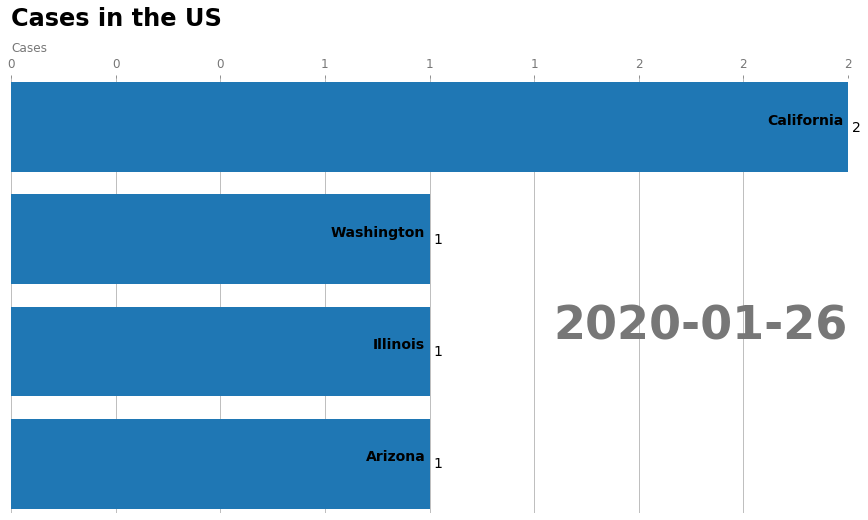

In [5]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(5, len(datas)))

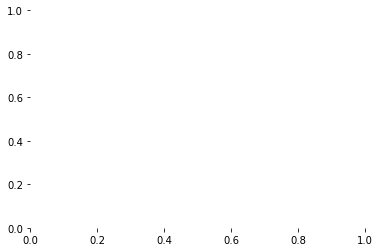

In [6]:
HTML(animator.to_jshtml())

In [7]:
pd_covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-28-2020.csv')
size = pd_covid.shape[0]
pd_covid.head(size)

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-04-29 02:32:33  32.3182   
1                     Alaska             US  2020-04-29 02:32:33  61.3707   
2             American Samoa             US  2020-04-29 02:32:33 -14.2710   
3                    Arizona             US  2020-04-29 02:32:33  33.7298   
4                   Arkansas             US  2020-04-29 02:32:33  34.9697   
5                 California             US  2020-04-29 02:32:33  36.1162   
6                   Colorado             US  2020-04-29 02:32:33  39.0598   
7                Connecticut             US  2020-04-29 02:32:33  41.5978   
8                   Delaware             US  2020-04-29 02:32:33  39.3185   
9           Diamond Princess             US  2020-04-29 02:32:33      NaN   
10      District of Columbia             US  2020-04-29 02:32:33  38.8974   
11                   Florida             US  2020-04-29 02:32:33  27.7663   
12                   Georgia             US  2020-04-29 02:32:33  33.0406   
13            Grand Princess             US  2020-04-29 02:32:33      NaN   
14                      Guam             US  2020-04-29 02:32:33  13.4443   
15                    Hawaii             US  2020-04-29 02:32:33  21.0943   
16                     Idaho             US  2020-04-29 02:32:33  44.2405   
17                  Illinois             US  2020-04-29 02:32:33  40.3495   
18                   Indiana             US  2020-04-29 02:32:33  39.8494   
19                      Iowa             US  2020-04-29 02:32:33  42.0115   
20                    Kansas             US  2020-04-29 02:32:33  38.5266   
21                  Kentucky             US  2020-04-29 02:32:33  37.6681   
22                 Louisiana             US  2020-04-29 02:32:33  31.1695   
23                     Maine             US  2020-04-29 02:32:33  44.6939   
24                  Maryland             US  2020-04-29 02:32:33  39.0639   
25             Massachusetts             US  2020-04-29 02:32:33  42.2302   
26                  Michigan             US  2020-04-29 02:32:33  43.3266   
27                 Minnesota             US  2020-04-29 02:32:33  45.6945   
28               Mississippi             US  2020-04-29 02:32:33  32.7416   
29                  Missouri             US  2020-04-29 02:32:33  38.4561   
30                   Montana             US  2020-04-29 02:32:33  46.9219   
31                  Nebraska             US  2020-04-29 02:32:33  41.1254   
32                    Nevada             US  2020-04-29 02:32:33  38.3135   
33             New Hampshire             US  2020-04-29 02:32:33  43.4525   
34                New Jersey             US  2020-04-29 02:32:33  40.2989   
35                New Mexico             US  2020-04-29 02:32:33  34.8405   
36                  New York             US  2020-04-29 02:32:33  42.1657   
37            North Carolina             US  2020-04-29 02:32:33  35.6301   
38              North Dakota             US  2020-04-29 02:32:33  47.5289   
39  Northern Mariana Islands             US  2020-04-29 02:32:33  15.0979   
40                      Ohio             US  2020-04-29 02:32:33  40.3888   
41                  Oklahoma             US  2020-04-29 02:32:33  35.5653   
42                    Oregon             US  2020-04-29 02:32:33  44.5720   
43              Pennsylvania             US  2020-04-29 02:32:33  40.5908   
44               Puerto Rico             US  2020-04-29 02:32:33  18.2208   
45              Rhode Island             US  2020-04-29 02:32:33  41.6809   
46            South Carolina             US  2020-04-29 02:32:33  33.8569   
47              South Dakota             US  2020-04-29 02:32:33  44.2998   
48                 Tennessee             US  2020-04-29 02:32:33  35.7478   
49                     Texas             US  2020-04-29 02:32:33  31.0545   
50                      Utah             US  2020-04-29 02:32:33  40.1500   
51        

In [8]:
pd_pop = pd.read_csv('C:/Users/pmcca/Documents/SCPRC-EST2019-18POP-RES.csv')
size = pd_pop.shape[0]
pd_pop.head(size)

SUMLEV REGION DIVISION  STATE                      NAME  POPESTIMATE2019  \
0       10      0        0      0             United States        328239523   
1       40      3        6      1                   Alabama          4903185   
2       40      4        9      2                    Alaska           731545   
3       40      4        8      4                   Arizona          7278717   
4       40      3        7      5                  Arkansas          3017804   
5       40      4        9      6                California         39512223   
6       40      4        8      8                  Colorado          5758736   
7       40      1        1      9               Connecticut          3565287   
8       40      3        5     10                  Delaware           973764   
9       40      3        5     11      District of Columbia           705749   
10      40      3        5     12                   Florida         21477737   
11      40      3        5     13                   Georgia         10617423   
12      40      4        9     15                    Hawaii          1415872   
13      40      4        8     16                     Idaho          1787065   
14      40      2        3     17                  Illinois         12671821   
15      40      2        3     18                   Indiana          6732219   
16      40      2        4     19                      Iowa          3155070   
17      40      2        4     20                    Kansas          2913314   
18      40      3        6     21                  Kentucky          4467673   
19      40      3        7     22                 Louisiana          4648794   
20      40      1        1     23                     Maine          1344212   
21      40      3        5     24                  Maryland          6045680   
22      40      1        1     25             Massachusetts          6892503   
23      40      2        3     26                  Michigan          9986857   
24      40      2        4     27                 Minnesota          5639632   
25      40      3        6     28               Mississippi          2976149   
26      40      2        4     29                  Missouri          6137428   
27      40      4        8     30                   Montana          1068778   
28      40      2        4     31                  Nebraska          1934408   
29      40      4        8     32                    Nevada          3080156   
30      40      1        1     33             New Hampshire          1359711   
31      40      1        2     34                New Jersey          8882190   
32      40      4        8     35                New Mexico          2096829   
33      40      1        2     36                  New York         19453561   
34      40      3        5     37            North Carolina         10488084   
35      40      2        4     38              North Dakota           762062   
36      40      2        3     39                      Ohio         11689100   
37      40      3        7     40                  Oklahoma          3956971   
38      40      4        9     41                    Oregon          4217737   
39      40      1        2     42              Pennsylvania         12801989   
40      40      1        1     44              Rhode Island          1059361   
41      40      3        5     45            South Carolina          5148714   
42      40      2        4     46              South Dakota           884659   
43      40      3        6     47                 Tennessee          6829174   
44      40      3        7     48                     Texas         28995881   
45      40      4        8     49                      Utah          3205958   
46      40      1        1     50                   Vermont           623989   
47      40      3        5     51                  Virginia          8535519   
48      40      4        9     53                Washington          7614893   
49  

In [9]:
cases = {}

for cov in pd_covid.iterrows():
    if cov[1].Confirmed is None:
        cases[cov[1].Province_State] = 0
    else:
        cases[cov[1].Province_State] = cov[1].Confirmed

In [10]:
population = {}

for cov in pd_pop.iterrows():
    population[cov[1].NAME] = cov[1].POPESTIMATE2019

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

Graphic bar with the percentage of the population infected

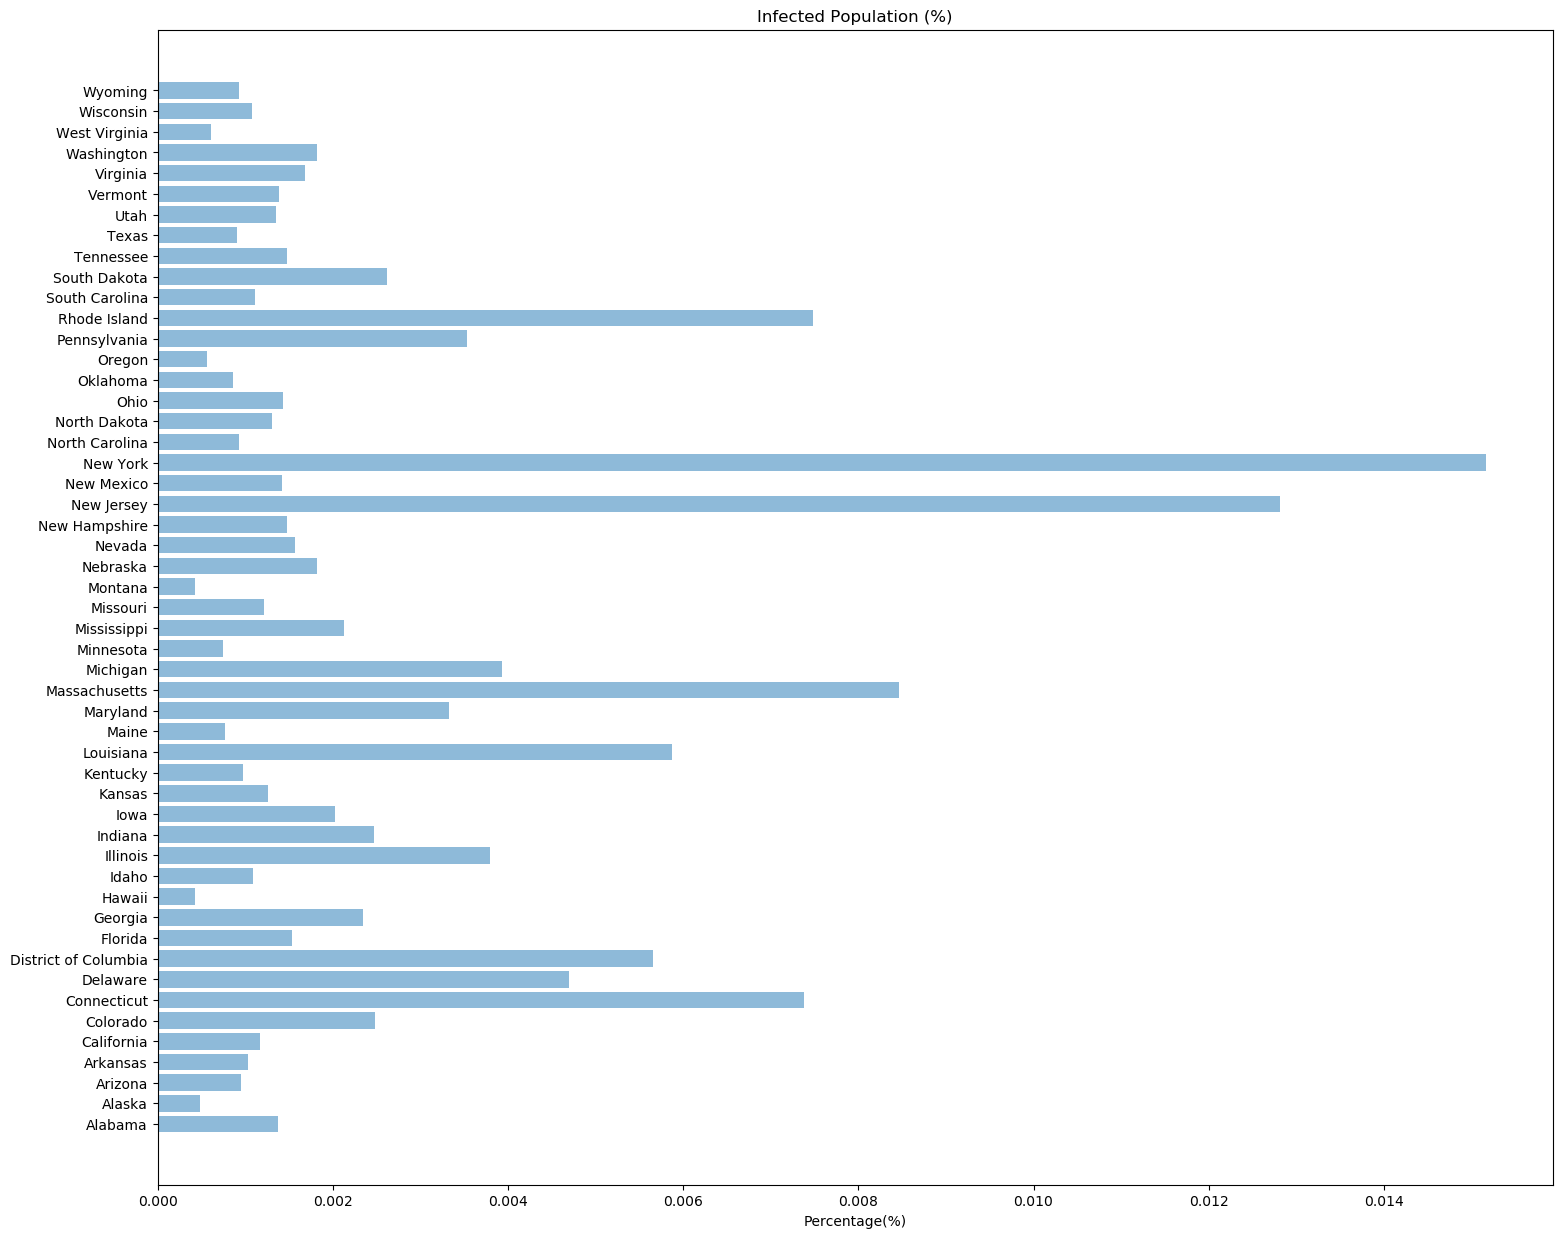

In [12]:
objects = []
performance = []

for key in cases.keys():
    if key in population:
        objects.append(key)
        performance.append(float(cases[key] / population[key]))

y_pos= list(range(0, len(objects)))

plt.figure(figsize=(18,15))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Percentage(%)')
plt.title('Infected Population (%)')

plt.show()

In [13]:
import matplotlib.pyplot as plt

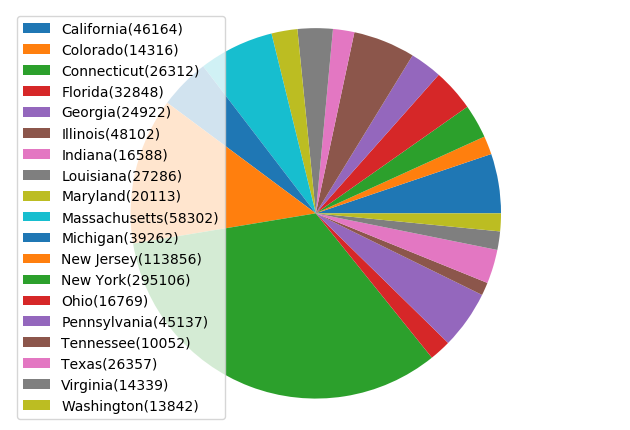

In [14]:
values = []
labels = []
for key in cases:
    if cases[key] > 10000:
        values.append(float(cases[key]))
        labels.append(key + '(' + str(cases[key]) + ')' )

patches, text = plt.pie(values)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Load the Qgis information to the notebook

In [15]:
QgsApplication.setPrefixPath(r"C:\OSGeo4W64\apps\qgis", True)

qgs = QgsApplication([], True)

qgs.initQgis()

sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')

Load the CSV file with information about COVID-19

In [16]:
path_to_csv = "file:///C:/Users/pmcca/Documents/04-28-2020.csv?delimiter=,&xField={}&yField={}".format('Long_', 'Lat')

csv_layer = QgsVectorLayer(path_to_csv, "EPID", "delimitedtext")
if not csv_layer.isValid():
    print("Layer failed to load!")
else:
    print('Load with sucess')

QgsProject.instance().addMapLayer(csv_layer)

Load with sucess


<QgsMapLayer: 'EPID' (delimitedtext)>

Load the CSV file with information about the US population

In [17]:
path_to_pop = "file:///C:/Users/pmcca/Documents/SCPRC-EST2019-18POP-RES.csv?delimiter=,"

pop_layer = QgsVectorLayer(path_to_pop, "POP", "delimitedtext")
if not pop_layer.isValid():
    print("Layer failed to load!")
else:
    print('Load with sucess')

QgsProject.instance().addMapLayer(pop_layer)

Load with sucess


<QgsMapLayer: 'POP' (delimitedtext)>

Load the SHP file with information about the US

In [18]:
path_to_shp = r"data\usa_states_map\tl_2017_us_state.shp"

shp = QgsVectorLayer(path_to_shp, "US", "ogr")
if not shp.isValid():
    print("Layer failed to load!")
else:
    print('Load with sucess')

    
shp_layer = shp.clone()
QgsProject.instance().addMapLayer(shp_layer)

provider = shp_layer.dataProvider()

Load with sucess


Join the information about the US with information about COVID-19.

In [19]:
shpField='NAME'
csvField='Province_State'
joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
shp_layer.addJoin(joinObject)

True

Join the information about the US population with the joined information in the previous cell.

In [20]:
shpField='NAME'
csvField='NAME'
joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(pop_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(pop_layer)
shp_layer.addJoin(joinObject)

True

Check the kind of operations can be done with shp_layer

In [21]:
caps = shp_layer.dataProvider().capabilities()

print(shp_layer.dataProvider().capabilitiesString())

Add Features, Delete Features, Change Attribute Values, Add Attributes, Delete Attributes, Rename Attributes, Create Spatial Index, Create Attribute Indexes, Fast Access to Features at ID, Change Geometries


Check states without COVID-19 values

In [22]:
updateMap = {}
id = provider.fields().indexFromName( 'EPID_Confirmed' )
idd = provider.fields().indexFromName( 'EPID_Deaths' )

for feature in shp_layer.getFeatures():

    if feature['EPID_Confirmed'] is None:
        #Juntar o if para verificar se é possivel
        updateMap[feature.id()] = { id: 0, idd: 0 }

provider.changeAttributeValues( updateMap )

True

Delete states without population info

In [23]:
population = []
cases = []
deaths = []
updateMap = {}
delete = []

for feature in shp_layer.getFeatures():

    if feature['POP_POPESTIMATE2019'] is None or feature['NAME'] == 'Alaska' or feature['NAME'] == 'Hawaii':#Mudar o EPID_Confirmed
        delete.append(feature.id())
    else:
        population.append(feature['POP_POPESTIMATE2019'])
        cases.append(feature['EPID_Confirmed'])
        deaths.append(feature['EPID_Deaths'])

#Imprimir os estados que foram eliminados

res = shp_layer.dataProvider().deleteFeatures(delete)
population.sort()
cases.sort()
deaths.sort()

Add fields, %Infected, %Population, %Dead, Dif(%) and PopInf(%)

The %Infected is the percentage of people with COVID-19 in that particular state in the US.

The %Population is the percentage of the population in the US in the state.

The %Dead is the percentage that dies with COVID-19 in that state in the US.

%Dif is the difference between the %Infected people and the %Dead.

And %PopInf is the ratio between the number of infected people and the population in the state.

In [24]:
if caps & QgsVectorDataProvider.AddAttributes:
    print('Add field')
    res = shp_layer.dataProvider().addAttributes(
        [QgsField('Inf(%USA)', QVariant.Double), QgsField('Pop(%USA)', QVariant.Double), 
        QgsField('Dead(%USA)', QVariant.Double), QgsField('Dif(%)', QVariant.Double), QgsField('PopInf(%)', QVariant.Double)])
    shp_layer.updateFields()

Add field


Add values to the features in the previously created fields 

In [25]:
updateMap = {}
perc_infected = provider.fields().indexFromName( 'Inf(%USA)' )
perc_pop = provider.fields().indexFromName( 'Pop(%USA)' )
perc_dead = provider.fields().indexFromName( 'Dead(%USA)' )
perc_dif = provider.fields().indexFromName( 'Dif(%)' )
perc_popInf = provider.fields().indexFromName( 'PopInf(%)' )

values_inf = sum(cases)
values_pop = sum(population)
values_dead = sum(deaths)

print(values_inf, values_pop, values_dead)

for feature in shp_layer.getFeatures():
    i = (feature['EPID_Confirmed'] / values_inf) * 100
    p = (feature['POP_POPESTIMATE2019'] / values_pop) * 100
    d = (feature['EPID_Deaths'] / values_dead) * 100
    dif = i - d
    pi = feature['EPID_Confirmed'] / feature['POP_POPESTIMATE2019']
    updateMap[feature.id()] = { perc_infected: i , perc_pop: p, perc_dead: d, perc_dif: dif, perc_popInf: pi}
provider.changeAttributeValues( updateMap )

1009858 326092106 58230


True

The following method adds a renderer to the shp_layer. This renderer makes possible the draw of the map.
This particular renderer creates a different group per state, and the color is proportional to the values.

In [26]:
def apply_graduated_symbology(target):
    target_field = target
    myRangeList = []
    
    values_list = []
    
    for feature in shp_layer.getFeatures():
        values_list.append(feature[target])
    values_list.sort()
     
    miin = min(values_list)
    maax = max(values_list)
    
    symbol = QgsSymbol.defaultSymbol(shp_layer.geometryType())     
    symbol.setColor(QColor(255, 20, 20))                              
    myRange = QgsRendererRange(0, values_list[0], symbol, 'Group 0')                   
    myRangeList.append(myRange)                                     

    i = 0
    for value in values_list:
        if i > 0:
            symbol = QgsSymbol.defaultSymbol(shp_layer.geometryType())
            red = ((values_list[i] - miin) / (maax - miin)) * 255
            symbol.setColor(QColor(255 - red, 20, 20))
            myRange = QgsRendererRange(values_list[i - 1], value, symbol, 'Group ' + str(i))
            myRangeList.append(myRange)
            i = i + 1
        else:
            i = i + 1

    myRenderer = QgsGraduatedSymbolRenderer(target_field, myRangeList)  
    myRenderer.setMode(QgsGraduatedSymbolRenderer.Custom)               

    shp_layer.setRenderer(myRenderer)                                  
    
    print(f"Graduated color scheme applied")

This particular renderer can be used with a negative and positive percentage.

In [27]:
def apply_graduated_symbology_dif(target):
    target_field = target
    myRangeList = []
    
    symbol = QgsSymbol.defaultSymbol(shp_layer.geometryType())
    symbol.setColor(QColor(255, 20, 20))
    myRange = QgsRendererRange(-100, 0, symbol, 'Group 0')
    myRangeList.append(myRange)
    
    symbol = QgsSymbol.defaultSymbol(shp_layer.geometryType())
    symbol.setColor(QColor(20, 255, 20))
    myRange = QgsRendererRange(0.00001, 100, symbol, 'Group 1')
    myRangeList.append(myRange)

    myRenderer = QgsGraduatedSymbolRenderer(target_field, myRangeList)  
    myRenderer.setMode(QgsGraduatedSymbolRenderer.Custom)               

    shp_layer.setRenderer(myRenderer)                                  
    
    print(f"Graduated color scheme applied")

Get the map information of the US layer

In [28]:
country = QgsProject.instance().mapLayersByName('US')[0]

The next cell generates the image with the renderer information made with the previous functions

In [29]:
def getImage():
    xt = country.extent()

    width  = 2000
    height = int(width*xt.height()/xt.width())
    print("Gerar mapa com {} por {}".format(width, height))

    options = QgsMapSettings()
    options.setLayers([country])
    options.setBackgroundColor(QColor(255, 255, 255))
    options.setOutputSize(QSize(width, height))
    options.setExtent(xt)

    render = QgsMapRendererParallelJob(options)
    render.start()
    render.waitForFinished()

    image = render.renderedImage()
    return image

In [30]:
from IPython.display import Image

Show a color map with the values of the number of cases

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated


Graduated color scheme applied
Gerar mapa com 2000 por 862


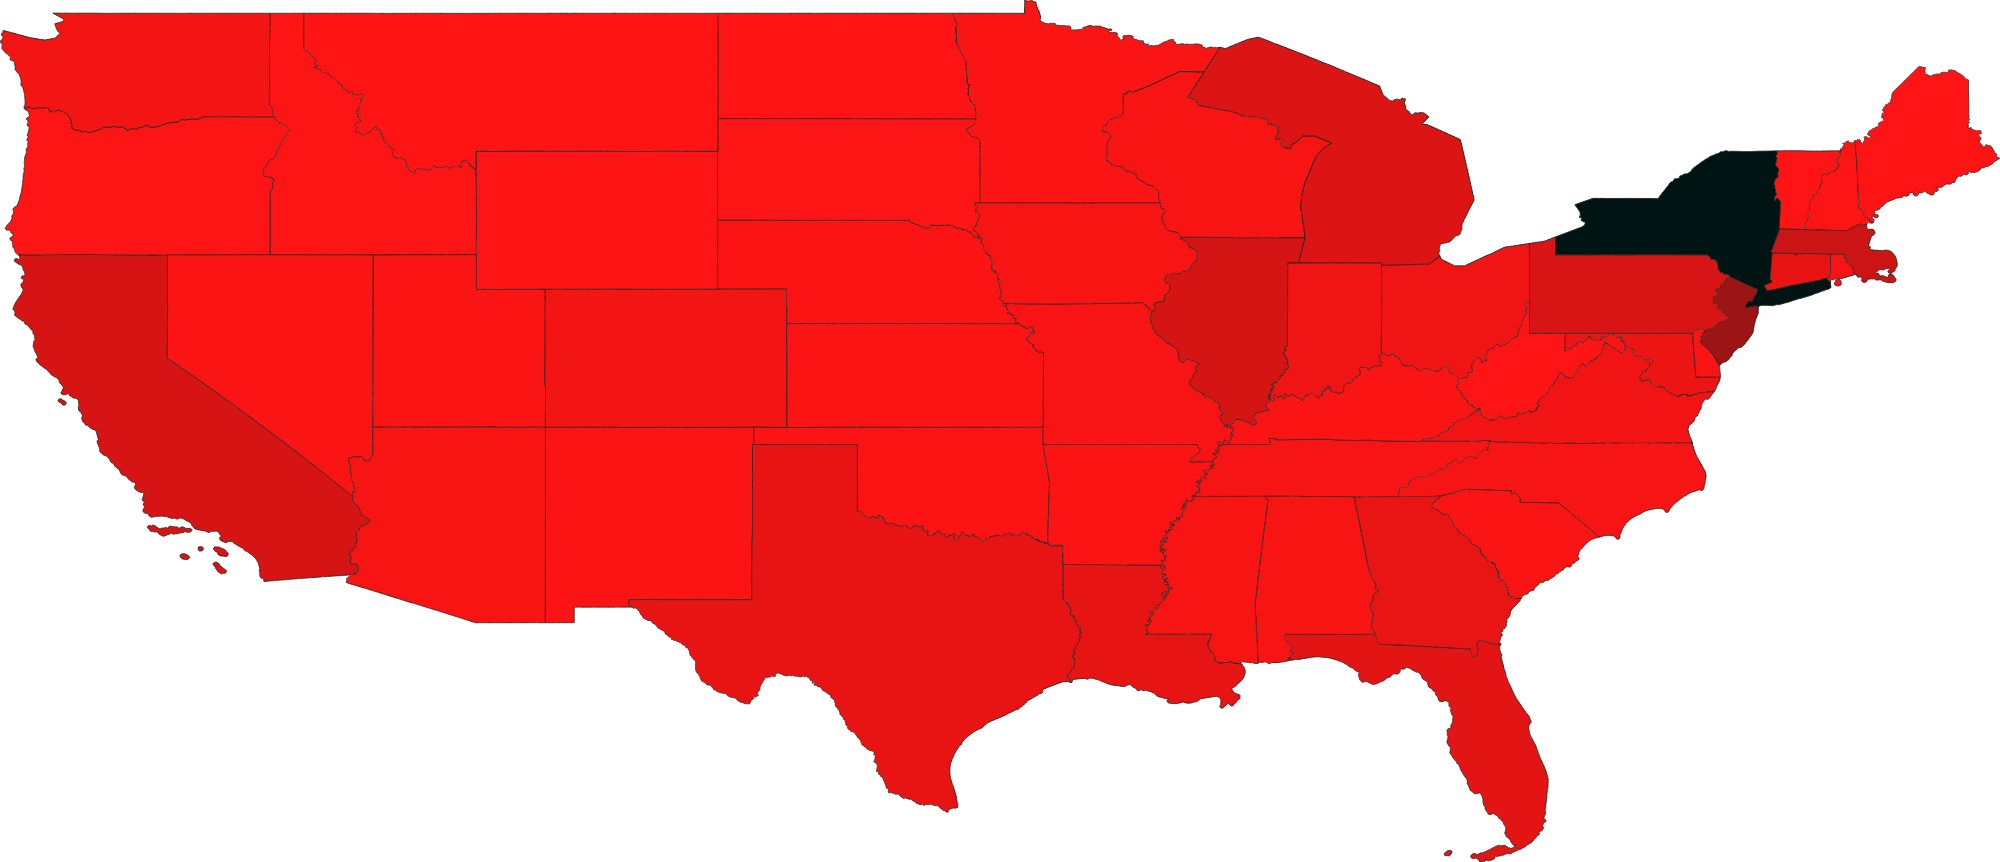

In [31]:
apply_graduated_symbology('EPID_Confirmed')

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image = getImage()
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

Color map with the balance between the infected percentage and dead percentage.
The red states the deed percentage is higher than the infected percentage. 

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated
  app.launch_new_instance()


Graduated color scheme applied
Gerar mapa com 2000 por 862


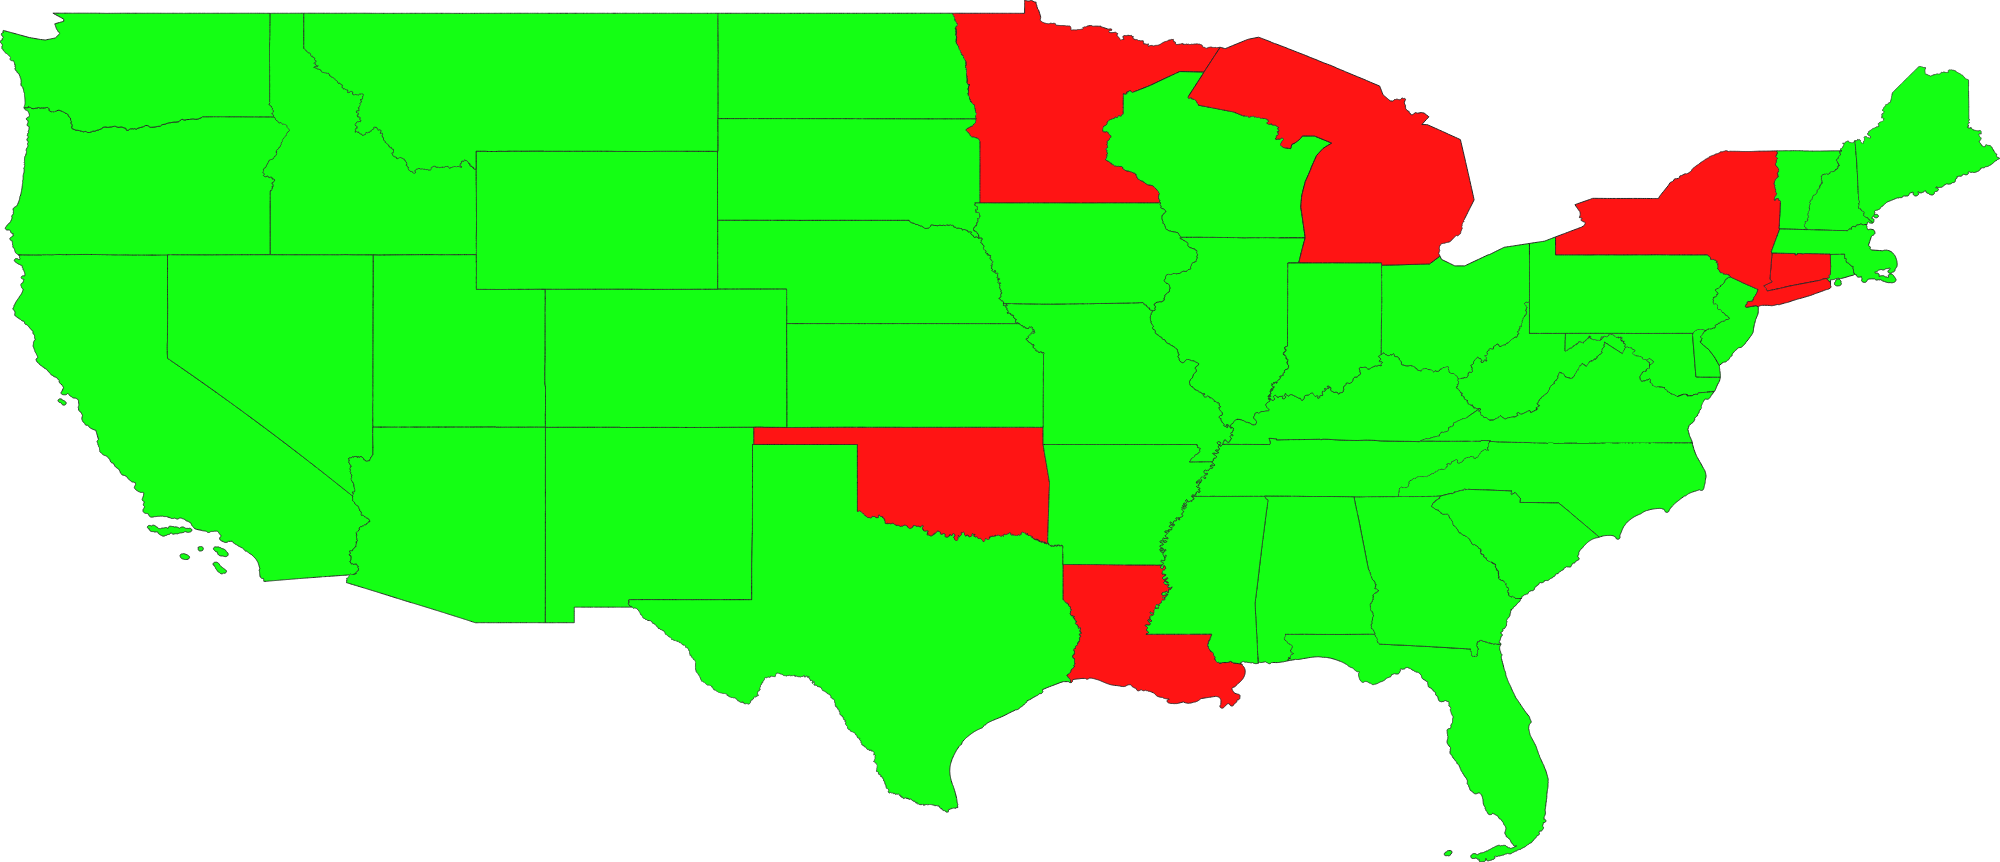

In [32]:
apply_graduated_symbology_dif('Dif(%)')

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image = getImage()
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [33]:
qgs.exitQgis()